<a href="https://colab.research.google.com/github/Insulin-bangkit-2022/deeplearningmethod/blob/main/Capstone_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.models import load_model
%matplotlib inline

**Import Diabetes Dataset from Kaggle**

Diabetes dataset is taken from kaggle and put in the team's github repository

In [7]:
url = 'https://raw.githubusercontent.com/Insulin-bangkit-2022/deeplearningmethod/main/diabetes_data.csv'
data = pd.read_csv(url, delimiter = ';')
data

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
613,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
614,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
615,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [8]:
print (data.shape)

(617, 17)


Changing gender (string) to int

In [9]:
data["gender"] = data["gender"].apply({"Male":1, "Female":0}.get)
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


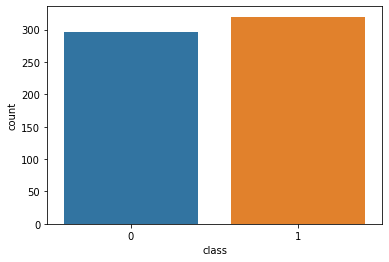

In [10]:
sns.countplot(x="class", data = data)

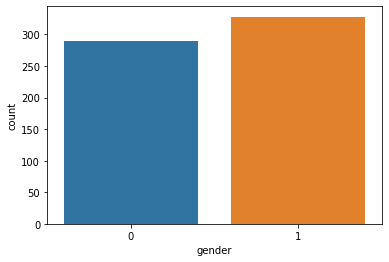

In [11]:
sns.countplot(x="gender", data = data)

**Plotting Heat Map**

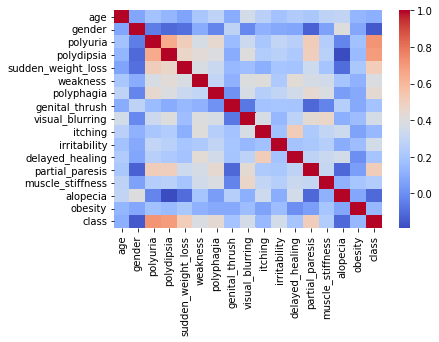

In [12]:
tc = data.corr()
sns.heatmap(tc,annot = False,cmap="coolwarm")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 617 non-null    int64
 1   gender              617 non-null    int64
 2   polyuria            617 non-null    int64
 3   polydipsia          617 non-null    int64
 4   sudden_weight_loss  617 non-null    int64
 5   weakness            617 non-null    int64
 6   polyphagia          617 non-null    int64
 7   genital_thrush      617 non-null    int64
 8   visual_blurring     617 non-null    int64
 9   itching             617 non-null    int64
 10  irritability        617 non-null    int64
 11  delayed_healing     617 non-null    int64
 12  partial_paresis     617 non-null    int64
 13  muscle_stiffness    617 non-null    int64
 14  alopecia            617 non-null    int64
 15  obesity             617 non-null    int64
 16  class               617 non-null    int64
dt

**Split the Dataset Into Training and Test Set**

In [14]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,random_state = 10)
print(x_train)
print(y_train)

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
78    39       0         1           1                   1         1   
236   60       1         0           0                   0         1   
419   72       1         1           0                   0         0   
163   45       0         0           0                   0         0   
383   51       0         0           0                   0         0   
..   ...     ...       ...         ...                 ...       ...   
369   37       0         0           0                   0         0   
320   65       0         0           0                   0         1   
527   46       1         0           0                   0         1   
125   55       1         1           1                   1         1   
265   28       0         0           0                   0         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
78            1               0                0        1   

**Training Dataset**

We build and train our diabetes dataset using Deep Neural Network

In [35]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dropout(0.2, input_dim = 16),
  tf.keras.layers.Dense(units = 300, activation = "relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units = 200, activation = "relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units = 100, activation = "relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units = 1,activation = "sigmoid"),
  ])

model.compile(optimizer = "Adam", 
              loss = "binary_crossentropy" , 
              metrics=["accuracy"])

#Here we train our model.
history = model.fit(x_train,y_train,epochs = 100,validation_data = (x_test,y_test))
#This the inference phase.We try our model on test data.
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

Epoch 1/100
17/17 [==============================] - 2s 15ms/step - loss: 1.1036 - accuracy: 0.5286 - val_loss: 0.8381 - val_accuracy: 0.5484
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7834 - accuracy: 0.5248 - val_loss: 0.6436 - val_accuracy: 0.6667
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.7170 - accuracy: 0.5859 - val_loss: 0.6851 - val_accuracy: 0.4731
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6617 - accuracy: 0.6298 - val_loss: 0.6322 - val_accuracy: 0.6452
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6800 - accuracy: 0.6240 - val_loss: 0.6148 - val_accuracy: 0.8065
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5974 - accuracy: 0.6832 - val_loss: 0.6117 - val_accuracy: 0.6452
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5938 - accuracy: 0.6775 - val_loss: 0.4865 - val_accuracy: 0.8495
Epoch 8/100


**Plot Accuracy and Loss**

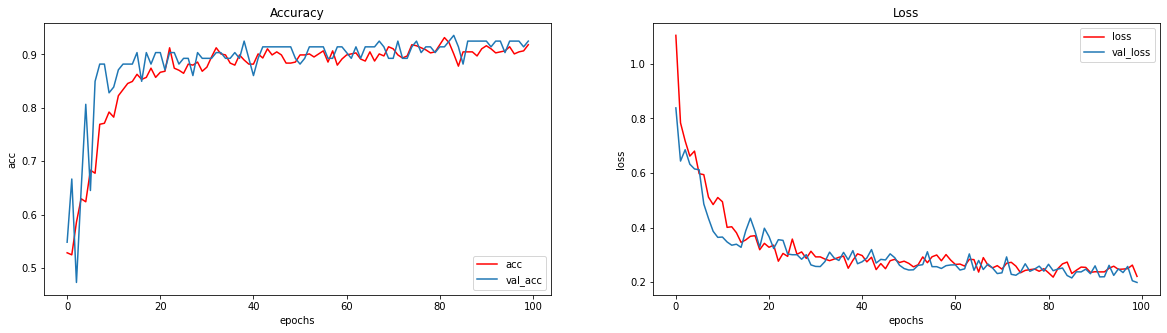

In [36]:
# Retrieve a list of list results on training and test data sets for each training epoch

acc      = history.history[ 'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]


fig, axes = plt.subplots(1,2,figsize=(20,5))
#Plot accuracy
axes[0].plot(acc, color='red')
axes[0].plot(val_acc)
axes[0].set_title('Accuracy')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('acc')
axes[0].legend(['acc', 'val_acc'], loc='lower right')
#Plot loss
axes[1].plot(loss, color='red')
axes[1].plot(val_loss)
axes[1].set_title('Loss')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('loss')
axes[1].legend(['loss', 'val_loss'], loc='upper right')

**Plotting Confusion Matrix**

In [37]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[37  5]
 [ 2 49]]


0.9247311827956989

In [38]:
def normalized_confusion_matrix(y_test, conf_mat, model):
    _ , counts = np.unique(y_test,return_counts=True)
    conf_mat = conf_mat/counts
    plt.figure(figsize=(6,5))
    ax=sns.heatmap(conf_mat,fmt='.2f',annot=True,annot_kws={'size':20},lw=2, cbar=True, cbar_kws={'label':'% Class accuracy'})
    plt.title(f'Confusion Matrix ({model})',size=22)
    plt.xticks(size=20)
    plt.yticks(size=20)
    ax.figure.axes[-1].yaxis.label.set_size(20) ##colorbar label
    cax = plt.gcf().axes[-1]  ##colorbar ticks
    cax.tick_params(labelsize=20) ## colorbar ticks
    plt.savefig(f'confusion-matrix-{model}.png',dpi=300)

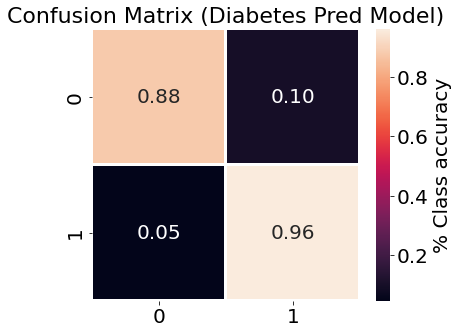

In [39]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat, 'Diabetes Pred Model')

In [40]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_36 (Dense)            (None, 300)               5100      
                                                                 
 dropout_15 (Dropout)        (None, 300)               0         
                                                                 
 dense_37 (Dense)            (None, 200)               60200     
                                                                 
 dropout_16 (Dropout)        (None, 200)               0         
                                                                 
 dense_38 (Dense)            (None, 100)               20100     
                                                                 
 dropout_17 (Dropout)        (None, 100)              

**Save the Model**

In [41]:
tf.saved_model.save(
    model,
    export_dir = "/tmp/myModel",
)

INFO:tensorflow:Assets written to: /tmp/myModel/assets


In [42]:
model.save('/tmp/myModel/new_model.h5')

In [ ]:
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://5172d3cb-201c-4b99-b2b8-55c6b8cb91fe/assets


In [ ]:
model = pickle.load(open('model.pkl','rb'))